First, we'll import `pandas` to load our csv files into DataFrames, and `matplotlib` to help us create data visualizations.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [4]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


It looks like our observations data contains a list of species, based on their scientific names, along with what National Park they were in and how many observations of this species occurred.

The species info data also shares the scientific name category and has more information about that species, such as common name, conservation status, and 'category' showing whether it's a mammal, reptile, etc.

In [6]:
species.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,80,80,7
Bird,521,521,79
Fish,127,127,11
Mammal,214,214,38
Nonvascular Plant,333,333,5
Reptile,79,79,5
Vascular Plant,4470,4470,46


In [7]:
species.scientific_name.count()

5824

In [8]:
len(pd.unique(species.scientific_name))

5541

In [9]:
species.drop_duplicates(inplace=True)
species.scientific_name.count()

5824

Since there are fewer unique scientific names for species than the total count, but there don't appear to be duplicate rows, I'm going to assume that there are some repeat names with different common names listed, as there are a ton of possible common names for each Latin name.

The species data is highly representative of vascular plants, and much less representative of other categories, especially reptiles and amphibians. We can also see that there only 'missing data' is under conservation_status and it seems safe to assume that missing data here means that their population is not considered threatened. We'll check what values exist for conservation_status.

In [10]:
species.groupby('conservation_status').count()

,category,scientific_name,common_names
conservation_status,,,
Endangered,16,16,16
In Recovery,4,4,4
Species of Concern,161,161,161
Threatened,10,10,10


Now I'd like to get some data about the observations, such as how many data points there are, how species repeat across parks, etc.

In [11]:
obs.count()

scientific_name    23296
park_name          23296
observations       23296
dtype: int64

In [12]:
len(pd.unique(obs.scientific_name))

5541

Above, we were able to see that there are 5824 species in our species_info data, but only 5541 unique species observed in our observations. This lines up with the number of unique scientific names in our species_info data.

In [25]:
endangered_df = species.loc[species['conservation_status'] == 'Endangered']
endangered_df.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,1,1,1
Bird,4,4,4
Fish,3,3,3
Mammal,7,7,7
Vascular Plant,1,1,1


In [26]:
recovery_df = species.loc[species['conservation_status'] == 'In Recovery']
recovery_df.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Bird,3,3,3
Mammal,1,1,1


In [27]:
soc_df = species.loc[species['conservation_status'] == 'Species of Concern']
soc_df.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,4,4,4
Bird,72,72,72
Fish,4,4,4
Mammal,28,28,28
Nonvascular Plant,5,5,5
Reptile,5,5,5
Vascular Plant,43,43,43


In [28]:
threatened_df = species.loc[species['conservation_status'] == 'Threatened']
threatened_df.groupby('category').count()

,scientific_name,common_names,conservation_status
category,,,
Amphibian,2,2,2
Fish,4,4,4
Mammal,2,2,2
Vascular Plant,2,2,2


In [30]:
# create counts for each category
amphibian_y = [1, 0, 4, 2]
bird_y = [4, 3, 72, 0]
fish_y = [4, 0, 4, 4]
mammal_y = [7, 1, 28, 2]
nv_plant_y = [0, 0, 5, 0]
reptile_y = [0, 0, 5, 0]
v_plant_y = [1, 0, 43, 2]

In [44]:
# labels for x-axis
cons_statuses = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']

In [32]:
# define a function to create our x-axis
# this will take in number of sets of data (t), bar width (w), order of data (n), and number of categories (d)
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

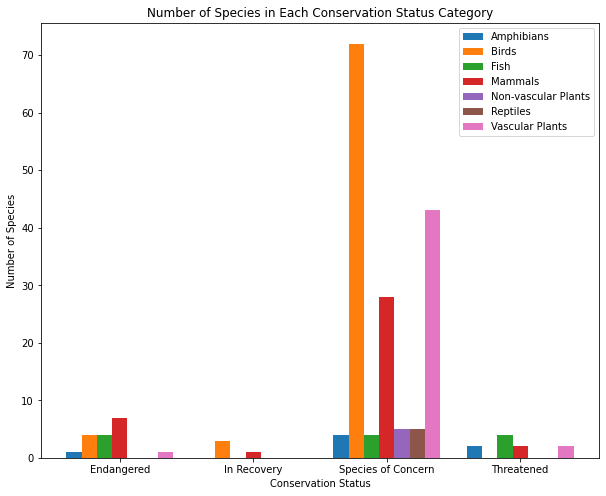

<Figure size 432x288 with 0 Axes>

In [54]:
# create x-axis objects
amphibian_x = create_x(7, 0.8, 1, 4)
bird_x = create_x(7, 0.8, 2, 4)
fish_x = create_x(7, 0.8, 3, 4)
mammal_x = create_x(7, 0.8, 4, 4)
nv_plant_x = create_x(7, 0.8, 5, 4)
reptile_x = create_x(7, 0.8, 6, 4)
v_plant_x = create_x(7, 0.8, 7, 4)

# set figure size
plt.figure(figsize=(10,8))

# set subplots
ax = plt.subplot()

# create bars
plt.bar(amphibian_x, amphibian_y)
plt.bar(bird_x, bird_y)
plt.bar(fish_x, fish_y)
plt.bar(mammal_x, mammal_y)
plt.bar(nv_plant_x, nv_plant_y)
plt.bar(reptile_x, reptile_y)
plt.bar(v_plant_x, v_plant_y)

# find the middle point of each conservation status
middle_x = [(a+b+c+d+e+f+g)/7.0 for a,b,c,d,e,f,g in zip(amphibian_x, bird_x, fish_x, mammal_x, nv_plant_x, reptile_x, v_plant_x)]

# set tick marks, axes, labels, legend
ax.set_xticks(middle_x)
ax.set_xticklabels(cons_statuses)
plt.legend(['Amphibians', 'Birds', 'Fish', 'Mammals', 'Non-vascular Plants', 'Reptiles', 'Vascular Plants'])
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Number of Species in Each Conservation Status Category')

plt.show()
plt.clf()

The above bar chart shows that the 'species of concern' status has the most organisms and is also the only conservation status with all seven types of organisms. One thing that makes this graph challenging to get real information from though is that there is a wide range of numbers of organisms in each category -- so we would expect there to be more vascular plants than reptiles in any category, for example. I'll reconfigure this data so that the graph shows percents of species for each conservation group.

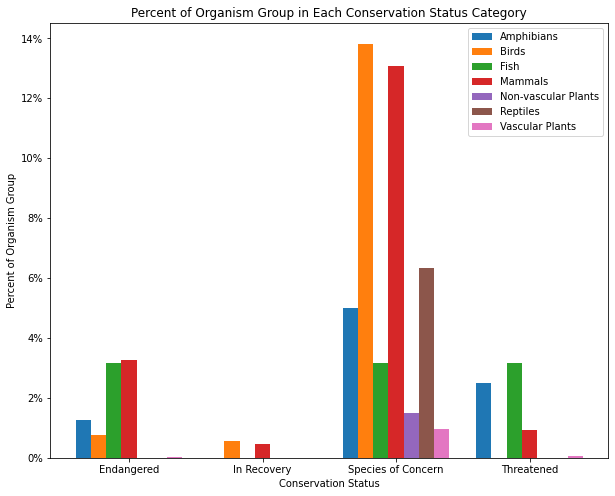

<Figure size 432x288 with 0 Axes>

In [60]:
# find percentage by dividing category counts by total organisms in that category
def to_percent(counts, total):
    return (np.array(counts)/total)*100

amphibian_percent = to_percent(amphibian_y, 80)
bird_percent = to_percent(bird_y, 521)
fish_percent = to_percent(fish_y, 127)
mammal_percent = to_percent(mammal_y, 214)
nv_plant_percent = to_percent(nv_plant_y, 333)
reptile_percent = to_percent(reptile_y, 79)
v_plant_percent = to_percent(v_plant_y, 4470)

# set figure size
plt.figure(figsize=(10,8))

# set subplots
ax = plt.subplot()

# create bars
plt.bar(amphibian_x, amphibian_percent)
plt.bar(bird_x, bird_percent)
plt.bar(fish_x, fish_percent)
plt.bar(mammal_x, mammal_percent)
plt.bar(nv_plant_x, nv_plant_percent)
plt.bar(reptile_x, reptile_percent)
plt.bar(v_plant_x, v_plant_percent)

# find the middle point of each conservation status
middle_x = [(a+b+c+d+e+f+g)/7.0 for a,b,c,d,e,f,g in zip(amphibian_x, bird_x, fish_x, mammal_x, nv_plant_x, reptile_x, v_plant_x)]

# set tick marks, axes, labels, legend
ax.set_xticks(middle_x)
ax.set_xticklabels(cons_statuses)
plt.legend(['Amphibians', 'Birds', 'Fish', 'Mammals', 'Non-vascular Plants', 'Reptiles', 'Vascular Plants'])
plt.xlabel('Conservation Status')
plt.ylabel('Percent of Organism Group')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100, 0))
plt.title('Percent of Organism Group in Each Conservation Status Category')

plt.show()
plt.clf()

The first thing I notice here is that the percentage of birds in 'Species of Concern' is still very high; so not only was the number of species of birds in the Species of Concern category large, but not all of that number was because of an outsized sample of that group. Whereas we see the percentage of vascular plants in that category is much lower than the total number of species would have suggested, because the group itself is so large. And reptiles didn't make much of an impression on the total count graph but there's a significantly high percentage of them in the Species of Concern category.

Another thing that becomes more obvious here is the relatively large percentage of fish and mammals that fall into the Endangered category (as well as fish in 'Threatened'). This was not obvious from the graph with total counts.

### Check observations against conservation status

In [66]:
# inner join our datasets on scientific_name from the species dataset
merged = pd.merge(species, obs, on=['scientific_name'])

In [62]:
merged.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128


In [68]:
# check which parks are included in our data
merged.groupby('park_name').count()

,category,scientific_name,common_names,conservation_status,observations
park_name,,,,,
Bryce National Park,6408,6408,6408,220,6408
Great Smoky Mountains National Park,6408,6408,6408,220,6408
Yellowstone National Park,6408,6408,6408,220,6408
Yosemite National Park,6408,6408,6408,220,6408


To make things a little more simple here and since I live near the Great Smoky Mountains Natonal Park, we'll work with data just from that park for our comparison.

In [79]:
# sort organisms in Great Smoky National Park by conservation status (yes or no)
mammal_obs = merged.loc[merged['category'] == 'Mammal']
mammal_obs_gsmnp = mammal_obs.loc[mammal_obs['park_name'] == 'Great Smoky Mountains National Park']
mammal_obs_gsmnp_cons = mammal_obs_gsmnp.loc[mammal_obs['conservation_status'] != 'NaN']
mammal_obs_gsmnp_safe = mammal_obs_gsmnp.loc[mammal_obs['conservation_status'].isnull()]
mammal_obs_gsmnp_safe.head()

,category,scientific_name,common_names,conservation_status,park_name,observations
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
7,Mammal,Bos bison,"American Bison, Bison",NaN,Great Smoky Mountains National Park,77
11,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,Great Smoky Mountains National Park,56
13,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,Great Smoky Mountains National Park,76
18,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,Great Smoky Mountains National Park,60


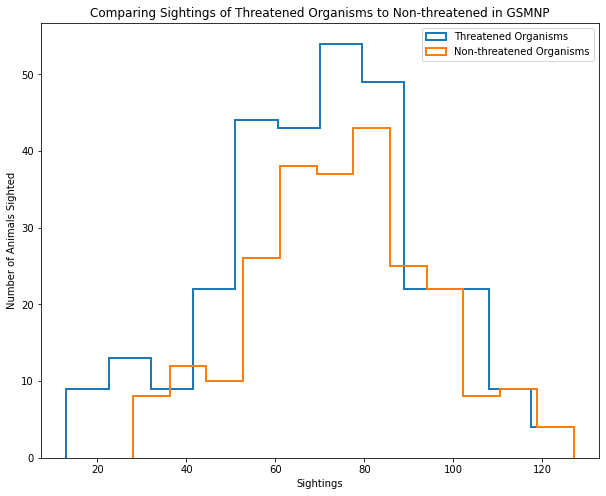

In [84]:
plt.figure(figsize=(10,8))

plt.hist(mammal_obs_gsmnp_cons.observations, bins=12, histtype='step', linewidth=2)
plt.hist(mammal_obs_gsmnp_safe.observations, bins=12, histtype='step', linewidth=2)
plt.legend(['Threatened Organisms', 'Non-threatened Organisms'])
plt.xlabel('Sightings')
plt.ylabel('Number of Animals Sighted')
plt.title('Comparing Sightings of Threatened Organisms to Non-threatened in GSMNP')

plt.show()

This graph is a little surprising to me. I suspected that threatened organisms would be observed less often, or I thought it could be possible they would be observed more often because they might live in habitats that are actively used and changed by humans. Possibly there is a combination of these in effect, but given our data, for whatever reason, it appears that organisms on a threatened conservation list are just as likely to be observed as animals that are not threatened.

## Conclusion